#  PREDICTION DE L'EFFICACITE ENERGETIQUE DES FOURS INDUSTRIELS

##### ce projet est présenté par:
#### - AGANZE CIKONZA Christian
#### - AMANI KATUMBI
#### - MWAMBA DJESE Merveille
#### - SAMWELI WAKIKA
#### - USHINDI BACHOKE Grace


### COMPREHENSION DE LA PROBLEMATIQUE

#### Dans ce projet il nous est demandé de  Prédire la consommation énergétique d'un four en fonction des caractéristiques d'entrée 

## COLLECTE DES DONNEES
### nous avions trouvé nos données sur  dataset Energy Efficiency of Furnaces (UCI - Lien).


## Data processing : Nettoyage,Analyse et visualisation des données

 ### - Importation des bibliotheques necessaire

In [3]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn import datasets, linear_model

### - Affichage des données

In [4]:
df = pd.read_csv("C:/Users/KAT 005/four.csv",sep=";",decimal=",") ### affichage des donnees
df = df.dropna(axis=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


### Type d'apprentissage : Apprentissage supervisé 

#### Préparation des données

In [13]:

X = df.iloc[:,0:8]  
df["efficacité"] = df["Y1"]/(df["Y1"] + df["Y2"]) 
y = df["efficacité"] 


In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## APPLICATION DES MODELES DE REGRESSION


### REGRESSIOM MULTIPLE


In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_lr = model_lr.predict(X_test)     
y_pred_lr

array([0.48782535, 0.44913848, 0.50177219, 0.50519263, 0.46705862,
       0.4734337 , 0.46917406, 0.4841947 , 0.47221792, 0.47229855,
       0.47660139, 0.4844968 , 0.47339491, 0.4295661 , 0.48536637,
       0.49221295, 0.50134404, 0.44056937, 0.45341031, 0.48376654,
       0.49872735, 0.49679179, 0.43338759, 0.47807237, 0.45605536,
       0.47734212, 0.49686195, 0.49653659, 0.45792754, 0.47134421,
       0.42043501, 0.43253463, 0.46377151, 0.47786274, 0.46602027,
       0.48273419, 0.49629432, 0.46675052, 0.4961317 , 0.42008192,
       0.49259553, 0.44129962, 0.40726789, 0.49678073, 0.41690927,
       0.40653764, 0.4198433 , 0.42081218, 0.47591612, 0.4909724 ,
       0.50014906, 0.46228693, 0.45023483, 0.49017199, 0.4467905 ,
       0.45203799, 0.43399514, 0.48955069, 0.51307756, 0.49550007,
       0.47072227, 0.49439958, 0.46009617, 0.47526031, 0.49186528,
       0.47588161, 0.47661186, 0.43484809, 0.46034094, 0.43728225,
       0.46426382, 0.50834642, 0.4578924 , 0.46612922, 0.49349

#### Visualisation des données (Out put) avec la regression multiple 

Text(0, 0.5, 'prédictions')

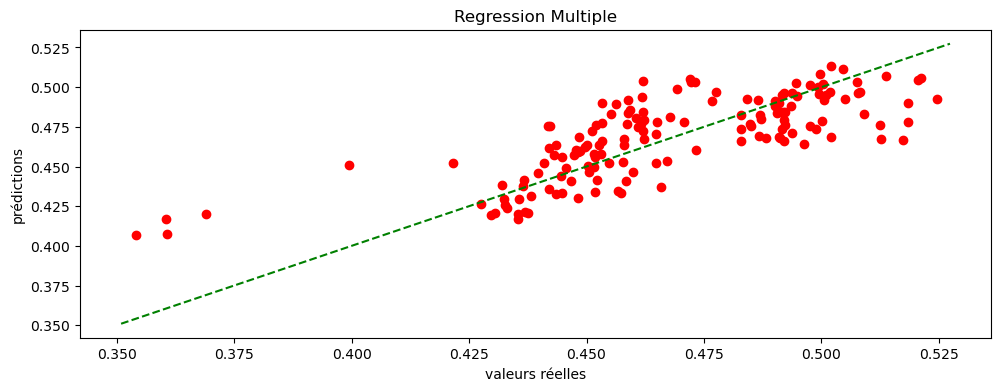

In [18]:
plt.figure (figsize=(40, 4))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr,color='red')
plt.plot([y.min(), y.max()],[y.min(), y.max()], color='green', linestyle='--')
plt.title('Regression Multiple')
plt.xlabel('valeurs réelles')
plt.ylabel('prédictions')

In [19]:
mse_lr = mean_squared_error(y_test, y_pred_lr)     ### evaluation MSE 
print(f'MSE Regression multiple : {mse_lr:.5f}')

mae_lr = mean_absolute_error(y_test, y_pred_lr)   ### evaluation MAE
print(f'MAE Regression multiple : {mae_lr:.5f}')

MSE Regression multiple : 0.00040
MAE Regression multiple : 0.01579


### XGBoost

In [20]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror') 
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred_xgb = model_xgb.predict(X_test)  ### on fait la prediction du modele
y_pred_xgb #### affichage de la prediction 

array([0.46972305, 0.4499445 , 0.49521264, 0.483791  , 0.45648837,
       0.47497338, 0.48775873, 0.49559388, 0.45946985, 0.4579337 ,
       0.46191287, 0.49236736, 0.49306375, 0.43123057, 0.46764883,
       0.49413317, 0.4987336 , 0.4504966 , 0.46669915, 0.48697254,
       0.48076886, 0.4842479 , 0.4525555 , 0.49484032, 0.4425182 ,
       0.46109945, 0.5085918 , 0.50347626, 0.45500344, 0.4908168 ,
       0.434962  , 0.44545463, 0.4571768 , 0.48123518, 0.46418878,
       0.49132934, 0.48131952, 0.5072465 , 0.50355846, 0.43403336,
       0.48249102, 0.45553425, 0.3542618 , 0.50302553, 0.3682946 ,
       0.3520114 , 0.3648772 , 0.43363795, 0.45615903, 0.48137233,
       0.49137384, 0.4476355 , 0.44828758, 0.495957  , 0.4736953 ,
       0.4373484 , 0.44939944, 0.46119294, 0.5130167 , 0.4925429 ,
       0.4549914 , 0.46620288, 0.44734088, 0.45655024, 0.48830116,
       0.49941972, 0.47451296, 0.45378378, 0.47253084, 0.45198232,
       0.49043334, 0.5040955 , 0.45038098, 0.48832992, 0.46293

#### Visualisation des données (Out put) avec la regression XGBoost

Text(0, 0.5, 'prédictions')

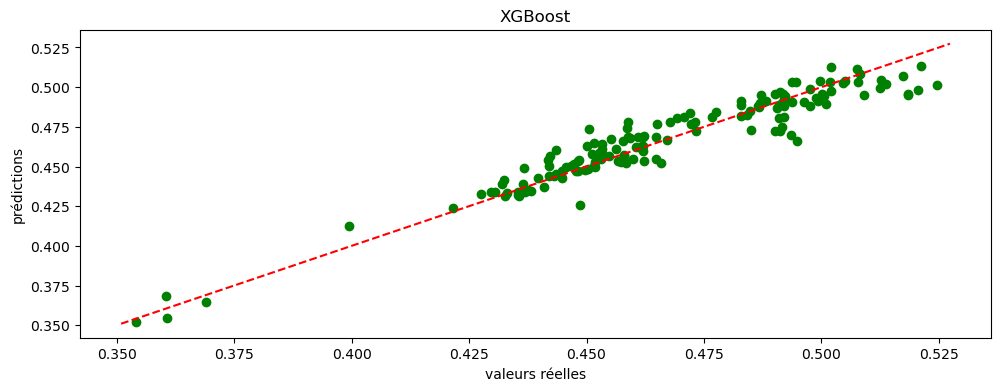

In [22]:
plt.figure(figsize=(40,4)) 
plt.subplot (1, 3, 2) 
plt.scatter(y_test, y_pred_xgb,color='green') 
plt.plot([y.min(), y.max()],[y.min(), y.max()], color='red', linestyle='--') 
plt.title('XGBoost') 
plt.xlabel('valeurs réelles')
plt.ylabel('prédictions') 

In [23]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb) ### Evaluation MSE
print(f'MSE XGBoost : {mse_xgb:.5f}')

mae_xgb = mean_absolute_error(y_test, y_pred_xgb) ### Evaluation MAE
print(f'MAE XGBoost : {mae_xgb:.5f}')



MSE XGBoost : 0.00008
MAE XGBoost : 0.00674


### RESEAUX DE NEURONES 

In [24]:
model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000,random_state=42)
model_nn.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [25]:
y_pred_nn = model_nn.predict(X_test_scaled)  ## prediction
y_pred_nn

array([0.53756079, 0.41710602, 0.58460284, 0.44963405, 0.44117399,
       0.42202247, 0.48196837, 0.51299276, 0.39595809, 0.48404316,
       0.49699289, 0.53278863, 0.49647546, 0.47615922, 0.55847266,
       0.51378969, 0.43377122, 0.41888011, 0.45534649, 0.47217531,
       0.49328877, 0.46499412, 0.36436858, 0.37410559, 0.48291953,
       0.38108745, 0.47111973, 0.51849761, 0.37455298, 0.51966112,
       0.43140318, 0.43572381, 0.41602518, 0.45149074, 0.48864503,
       0.43696408, 0.46533135, 0.41485905, 0.48017176, 0.3727647 ,
       0.50245333, 0.38304156, 0.3627666 , 0.49385376, 0.36838906,
       0.36571114, 0.41851346, 0.42068095, 0.47031553, 0.47819412,
       0.48937612, 0.53028361, 0.42505694, 0.48450024, 0.50809465,
       0.38022161, 0.4530579 , 0.47781186, 0.49869025, 0.50697863,
       0.44093952, 0.621659  , 0.39438893, 0.51161591, 0.46660915,
       0.49024367, 0.44498489, 0.43430336, 0.43329565, 0.44296444,
       0.43345808, 0.57981478, 0.44065101, 0.40578592, 0.52181

#### Visualisation des données (Out put) avec Réseaux de Neuronnes 

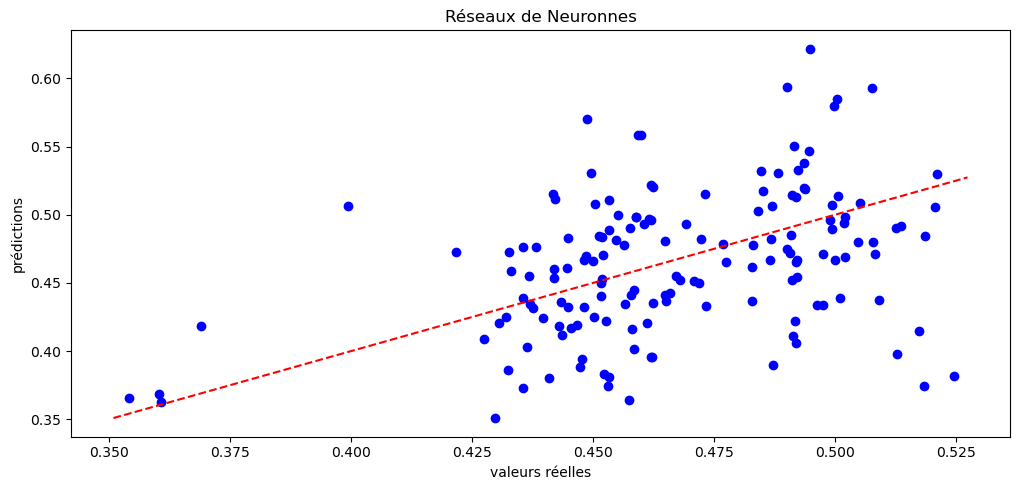

In [27]:
plt.figure(figsize=(30,5))
plt.subplot (1, 3, 3) 
plt.scatter(y_test, y_pred_nn,color='blue') 
plt.plot([y.min(), y.max()],[y.min(), y.max()], color='red', linestyle='--') 
plt.title('Réseaux de Neuronnes') 
plt.xlabel('valeurs réelles') 
plt.ylabel('prédictions') 
plt.tight_layout() 
plt.show() 

In [51]:
mse_nn = mean_squared_error(y_test, y_pred_nn) ## Mean Squared Error
print(f'MSE Réseau de Neurones : {mse_nn:.5f}')   

mae_nn = mean_absolute_error(y_test, y_pred_nn) ## Meab Absolute Error
print(f'MAE Reseau de Neuronnes : {mae_nn:.5f}')


MSE Réseau de Neurones : 0.00244
MAE Reseau de Neuronnes : 0.03890
